# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2018

# Signals - power and energy

The energy of a continuous-time complex signal $x(t)$ is defined as
\begin{equation}
    E_x = \int_{-\infty}^{\infty} |x(t)|^2 \mathrm{d}t
\end{equation}
If the signal $x(t)$ is real, the modulus operator in the above equation does not matter. This is called energy in
signal processing terms. This is also a measure of signal strength

In the discrete domain, the energy of the signal is given by
\begin{equation}
    E_x = \sum^{\infty}_ {n = -\infty} |x(n)|^2.
\end{equation}
The energy is finite only if the above sum converges to a finite value. This implies that the signal is *squarely-summable*. Such a signal is called finite energy signal. If the given signal does not decay with respect to time
(example: a continuous sine wave repeating its cycle infinitely), the energy will be infinite and such a signal is
*not-squarely-summable* in other words. We need another measurable quantity to circumvent this problem. This
leads us to the notion of **Power**.

**Power** is defined as the amount of energy consumed per unit time. This quantity is useful if the energy of the
signal goes to infinity or the signal is *not-squarely-summable*.
1. Take a snapshot of the signal over some finite time duration;
1. Compute the energy of the signal $E_x$;
1. Divide the energy by number of samples taken for computation $N$;
1. Extend the limit of number of samples to infinity $N \rightarrow \infty$. This gives the total power of the signal.
In discrete domain, the total power of the signal is given by
\begin{equation}
    P_x = \lim_{N \rightarrow \infty} \frac{1}{2N + 1} \sum^{n = N}_ {n = -N} |x(n)|^2,
\end{equation}
or (others text books)
\begin{equation}
    P_x = \lim_{N \rightarrow \infty} \frac{1}{N} \sum^{n = N - 1}_ {n = 0} |x(n)|^2.
\end{equation}

### Example
Thus if the pure sine wave is of amplitude $A$ = 1V and frequency $f_c$ = 100 Hz, the power spectrum will have
two spikes of value $A^2/4$ = 0.25 at 100 Hz and −100 Hz frequencies. The total power will be $A^2/4 + A^2/4$ =
0.25 + 0.25 = 0.5 W. In order to verify this through simulation, a sine wave of 100 Hz frequency and amplitude
1 V is taken for the experiment.

<IPython.core.display.Javascript object>


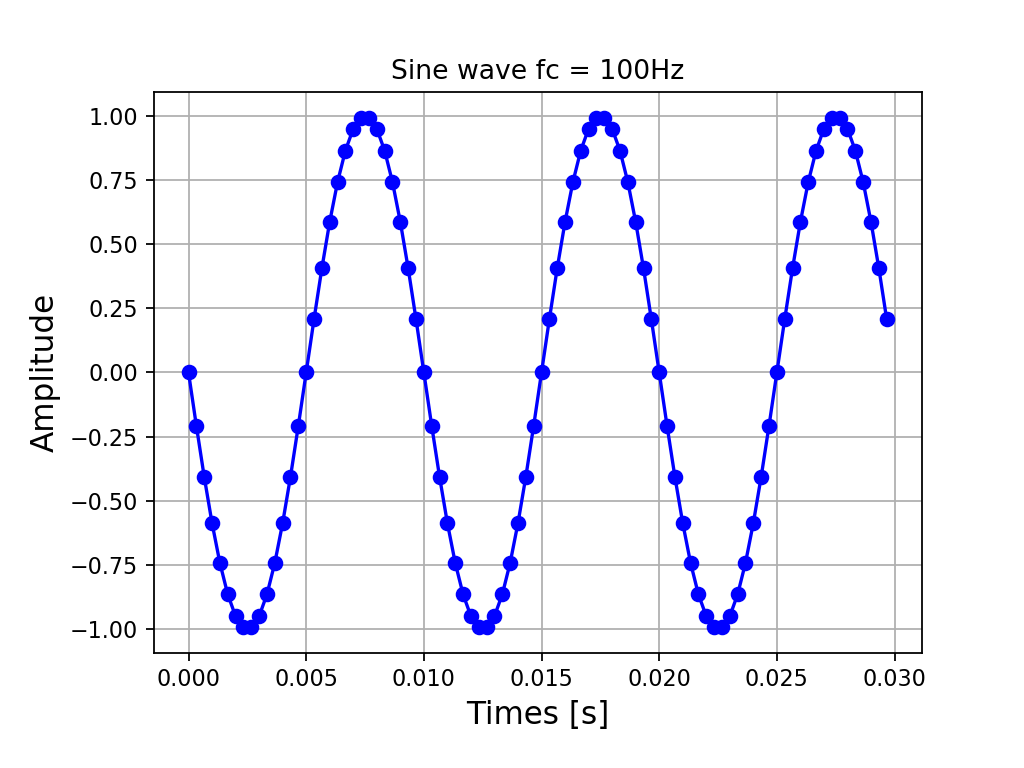

In [48]:
%matplotlib notebook
import numpy as num
import matplotlib.pyplot as plt

# Signal parameters
A = 1;
NCyl = 3;

fc = 100;
fs = 30*fc;
t = num.arange(0, NCyl/fc, 1/fs);
x_1 = -A*num.sin(2*num.pi*fc*t);
x_2 = -A*num.sin(2*num.pi*3*fc*t);

plt.figure();
plt.plot(t, x_1, 'bo-');
s = 'Sine wave fc = ' + str(fc) + 'Hz'
plt.title(s);
plt.xlabel("Times [s]", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);

In [49]:
# Calculate power of the discrete signal
L = num.size(x_1);
P = (num.linalg.norm(x_1)**2)/L
print("Power of the Signal from Time domain: %.2f" % P)

Power of the Signal from Time domain: 0.50


Here, the total power is verified by applying Discrete Fourier Transform (DFT) on the sinusoidal sequence.
The sinusoidal sequence $x[n]$ is represented in frequency domain $X[f]$. The power associated with each frequency point is computed as
\begin{equation}
    P_x[f] = X[f]X^*[f]
\end{equation}

<IPython.core.display.Javascript object>


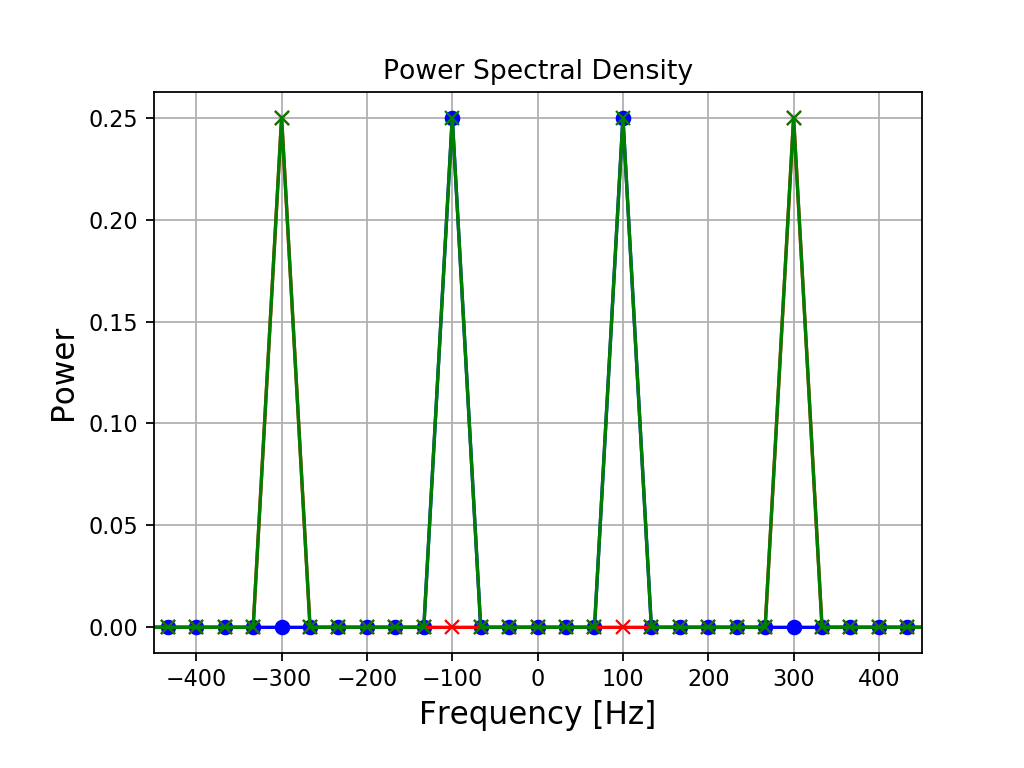

C:\Users\Adolfo\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


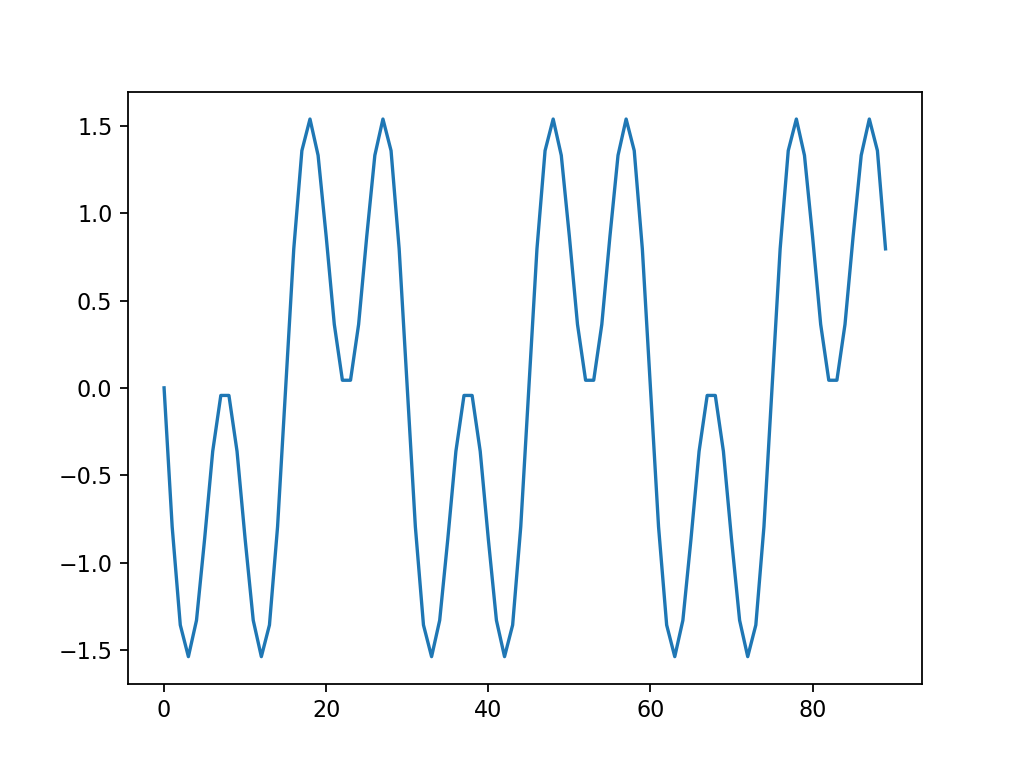

In [56]:
NFFT = L;
X_1    = num.fft.fftshift(num.fft.fft(x_1, NFFT));
Px_1   = X_1 * num.conj(X_1) / (L**2);
fVals_1= fs / NFFT * num.arange(-NFFT/2, NFFT/2);
X_2    = num.fft.fftshift(num.fft.fft(x_2, NFFT));
Px_2   = X_2 * num.conj(X_2) / (L**2);
fVals_2= fs / NFFT * num.arange(-NFFT/2, NFFT/2);
x_12 = x_1 + x_2;
X_12    = num.fft.fftshift(num.fft.fft(x_12, NFFT));
Px_12   = X_12 * num.conj(X_12) / (L**2);

plt.figure();
plt.plot(fVals_1, Px_1, 'bo-', fVals_2, Px_2, 'rx-', fVals_2, Px_12, 'gx-');
plt.xlim(-450,450)
plt.title("Power Spectral Density");
plt.xlabel("Frequency [Hz]", fontsize = 14);
plt.ylabel("Power"         , fontsize = 14);
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)
plt.grid(True);

plt.figure();
plt.plot(x_12)